# Act Report 
# Analyzing, and Visualizing Data

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [4]:
matplotlib.style.use('ggplot')

In [6]:
dataframe = pd.read_csv('/home/jovyan/demo/Untitled Folder/twitter_archive_master.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id                1993 non-null int64
timestamp               1993 non-null object
source                  1993 non-null object
text                    1993 non-null object
expanded_urls           1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null float64
name                    1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
jpg_url                 1993 non-null object
dog_stage               1993 non-null object
prediction_algorithm    1685 non-null object
confidence_level        1993 non-null float64
dog_gender              862 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 249.2+ KB


In [7]:
dataframe.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,38952,8636,6629272,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,NaN
1,679877062409191424,2015-12-24 04:11:37,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,2107,707,6629646,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000,NaN
2,680055455951884288,2015-12-24 16:00:30,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,17919,7867,6629646,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466,male
3,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2755,965,6629646,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
4,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,13700,9801,6629646,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000,NaN


In [8]:
# Convert columns to their appropriate types and set the timestamp as an index

dataframe['tweet_id'] = dataframe['tweet_id'].astype(object)
dataframe['timestamp'] = pd.to_datetime(dataframe.timestamp)
dataframe['source'] = dataframe['source'].astype('category')
dataframe['dog_stage'] = dataframe['dog_stage'].astype('category')
dataframe['dog_gender'] = dataframe['dog_gender'].astype('category')

dataframe.set_index('timestamp', inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993 entries, 2017-08-01 16:23:56 to 2016-06-03 01:07:16
Data columns (total 15 columns):
tweet_id                1993 non-null object
source                  1993 non-null category
text                    1993 non-null object
expanded_urls           1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null float64
name                    1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
jpg_url                 1993 non-null object
dog_stage               1993 non-null category
prediction_algorithm    1685 non-null object
confidence_level        1993 non-null float64
dog_gender              862 non-null category
dtypes: category(3), float64(3), int64(3), object(6)
memory usage: 208.6+ KB


In [9]:
dataframe.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1993.000000
mean,12.213638,10.510286,8882.965379,2731.905168,6.629520e+06,0.464930
std,41.473908,7.263336,12609.068748,4714.424803,1.691947e+02,0.339545
min,0.000000,7.000000,80.000000,13.000000,6.629057e+06,0.000000
25%,10.000000,10.000000,1930.000000,612.000000,6.629344e+06,0.140394
50%,11.000000,10.000000,4053.000000,1318.000000,6.629536e+06,0.458746
75%,12.000000,10.000000,11192.000000,3139.000000,6.629660e+06,0.776400
max,1776.000000,170.000000,143885.000000,77689.000000,6.629803e+06,0.999956


**Plot the correlation map to see the relationship between variables**


Text(0.5, 1, 'Correlation Map')

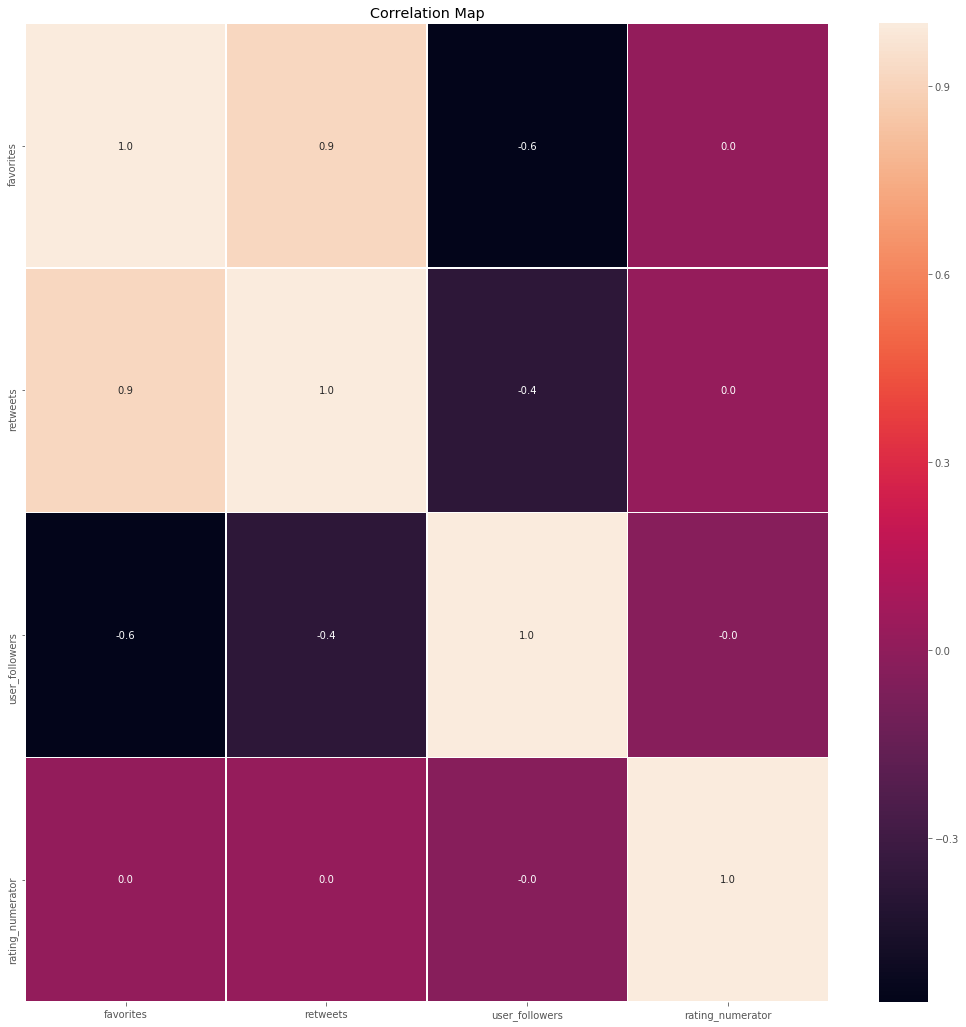

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataframe[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')


- User followers and retweet have a weak negative correlation of -0.4 (this seems the opposite of normal prediction)
- Rating don't get affected with any other variable from the ones we ploted

#### Tweet Retweet Vs Favorites.

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

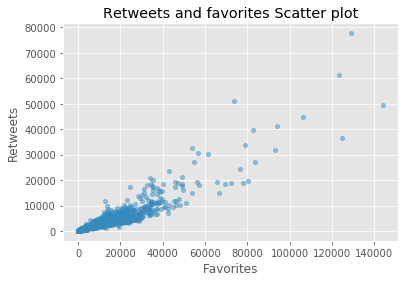

In [11]:
dataframe.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows that retweet is high correlated with favorites.

### Rating System

Text(0, 0.5, 'Rating')

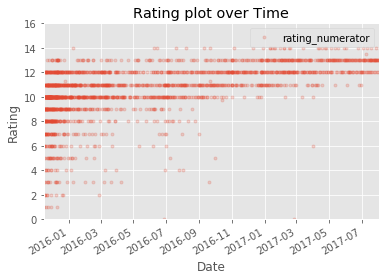

In [12]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
dataframe.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')


- The page start with small rating than they adopt the system of rating numerator more than the denominator


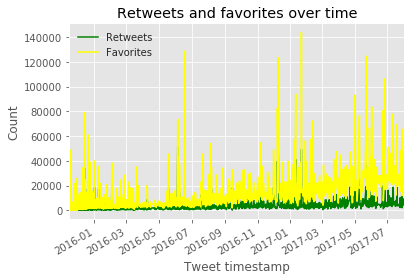

In [14]:
dataframe['retweets'].plot(color = 'green', label='Retweets')
dataframe['favorites'].plot(color = 'yellow', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

- Brent has all the right to get mad (ratings getting higher with no specific reason)


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


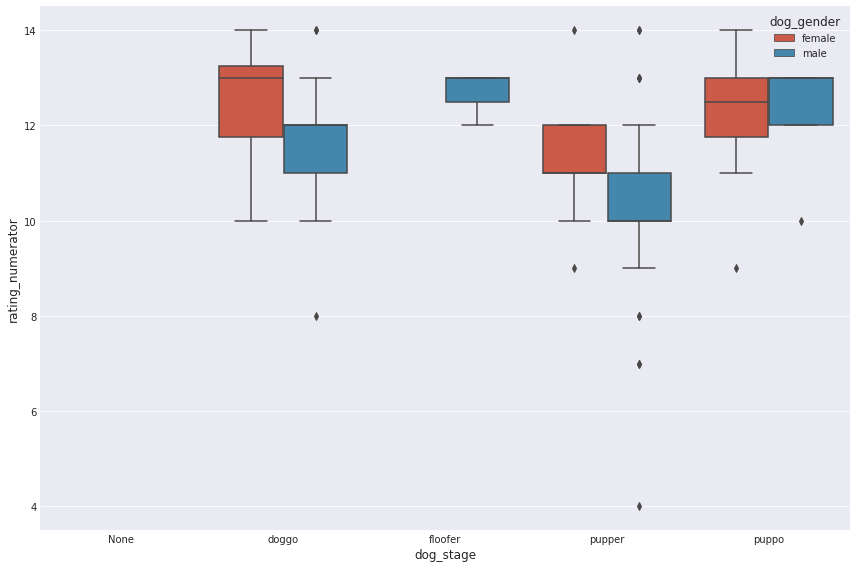

In [16]:
sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=dataframe[dataframe['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.5,   
               legend_out=False) 

- According to this we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

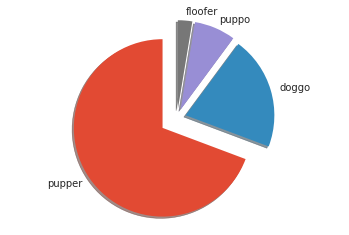

In [17]:
# Plot the data partitioned by dog stage
dog_stage_count = list(dataframe[dataframe['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = dataframe[dataframe['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [18]:
dataframe[dataframe['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64

- Pupper is the most owned dog, but it has the lowest mean rating

### Summary

In This ,The Twitter account `WeRateDogs` (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "16/10". It has acquired over 4.5 million followers.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother